In [132]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [134]:
# load dataset
df = pd.read_csv("Most-Recent-Cohorts-Field-of-Study.csv", low_memory=False)

In [135]:
#explore dataset
print(df.shape)
print(df.columns.tolist())
df.head()

(229188, 174)
['UNITID', 'OPEID6', 'INSTNM', 'CONTROL', 'MAIN', 'CIPCODE', 'CIPDESC', 'CREDLEV', 'CREDDESC', 'IPEDSCOUNT1', 'IPEDSCOUNT2', 'DEBT_ALL_STGP_ANY_N', 'DEBT_ALL_STGP_ANY_MEAN', 'DEBT_ALL_STGP_ANY_MDN', 'DEBT_ALL_STGP_EVAL_N', 'DEBT_ALL_STGP_EVAL_MEAN', 'DEBT_ALL_STGP_EVAL_MDN', 'DEBT_ALL_PP_ANY_N', 'DEBT_ALL_PP_ANY_MEAN', 'DEBT_ALL_PP_ANY_MDN', 'DEBT_ALL_PP_EVAL_N', 'DEBT_ALL_PP_EVAL_MEAN', 'DEBT_ALL_PP_EVAL_MDN', 'DEBT_MALE_STGP_ANY_N', 'DEBT_MALE_STGP_ANY_MEAN', 'DEBT_MALE_STGP_ANY_MDN', 'DEBT_MALE_STGP_EVAL_N', 'DEBT_MALE_STGP_EVAL_MEAN', 'DEBT_MALE_STGP_EVAL_MDN', 'DEBT_MALE_PP_ANY_N', 'DEBT_MALE_PP_ANY_MEAN', 'DEBT_MALE_PP_ANY_MDN', 'DEBT_MALE_PP_EVAL_N', 'DEBT_MALE_PP_EVAL_MEAN', 'DEBT_MALE_PP_EVAL_MDN', 'DEBT_NOTMALE_STGP_ANY_N', 'DEBT_NOTMALE_STGP_ANY_MEAN', 'DEBT_NOTMALE_STGP_ANY_MDN', 'DEBT_NOTMALE_STGP_EVAL_N', 'DEBT_NOTMALE_STGP_EVAL_MEAN', 'DEBT_NOTMALE_STGP_EVAL_MDN', 'DEBT_NOTMALE_PP_ANY_N', 'DEBT_NOTMALE_PP_ANY_MEAN', 'DEBT_NOTMALE_PP_ANY_MDN', 'DEBT_NOTMALE_

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_PELL_WNE_5YR,EARN_PELL_WNE_MDN_5YR,EARN_COUNT_NOPELL_WNE_5YR,EARN_NOPELL_WNE_MDN_5YR,EARN_COUNT_MALE_WNE_5YR,EARN_MALE_WNE_MDN_5YR,EARN_COUNT_NOMALE_WNE_5YR,EARN_NOMALE_WNE_MDN_5YR,EARN_COUNT_HIGH_CRED_5YR,EARN_IN_STATE_5YR
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,3.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,4.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS


In [136]:
# filter for Bachelor programs
bachelors_df = df[df['CREDDESC'].str.contains("Bachelor's Degree", na=False)]
bachelors_df.shape

(72204, 174)

In [137]:
# select relevent fields
selected_cols = [
    'INSTNM', 'CIPDESC', 'CREDLEV', 'CREDDESC',
    'DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR',
    'EARN_MDN_5YR']
data = bachelors_df[selected_cols].copy()
data.shape

(72204, 8)

In [138]:
# Convert debt and income to numeric
for column in ['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with missing values in the chosen columns
df_clean = data.dropna(subset=['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR'])

In [139]:
# Features for clustering
features = ['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR']
X = df_clean[features]

In [140]:
# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [141]:
# Elbow method to find optimal k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

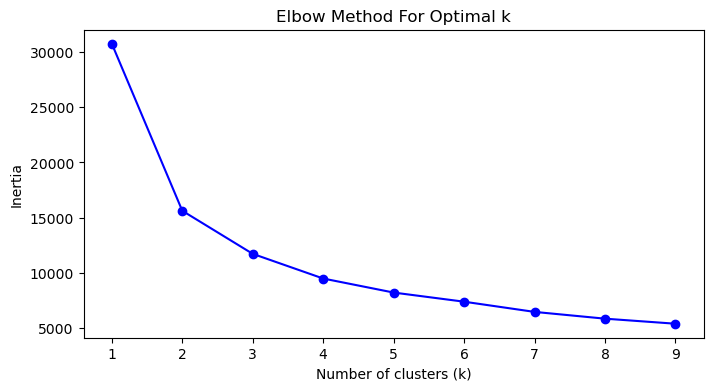

In [142]:
# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [143]:
# KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\layan\AppData\Local\Temp\ipykernel_14276\4289881873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


In [144]:
# Display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_df)

   DEBT_ALL_PP_ANY_MDN  EARN_MDN_1YR  EARN_MDN_4YR  EARN_MDN_5YR
0         30661.757836  71020.843782  80716.773509  92637.398888
1         22531.440678  36649.238204  46678.449153  54168.039853
2         57418.112593  37219.880000  53482.528148  63442.617037


In [145]:
cluster_labels = {
    0: 'Moderate-Debt High-Earnings',
    1: 'Low-Debt Low-Earnings',
    2: 'High-Debt Moderate-Earnings'}

df_clean['Cluster_Label'] = df_clean['Cluster'].map(cluster_labels)

C:\Users\layan\AppData\Local\Temp\ipykernel_14276\2824614494.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster_Label'] = df_clean['Cluster'].map(cluster_labels)


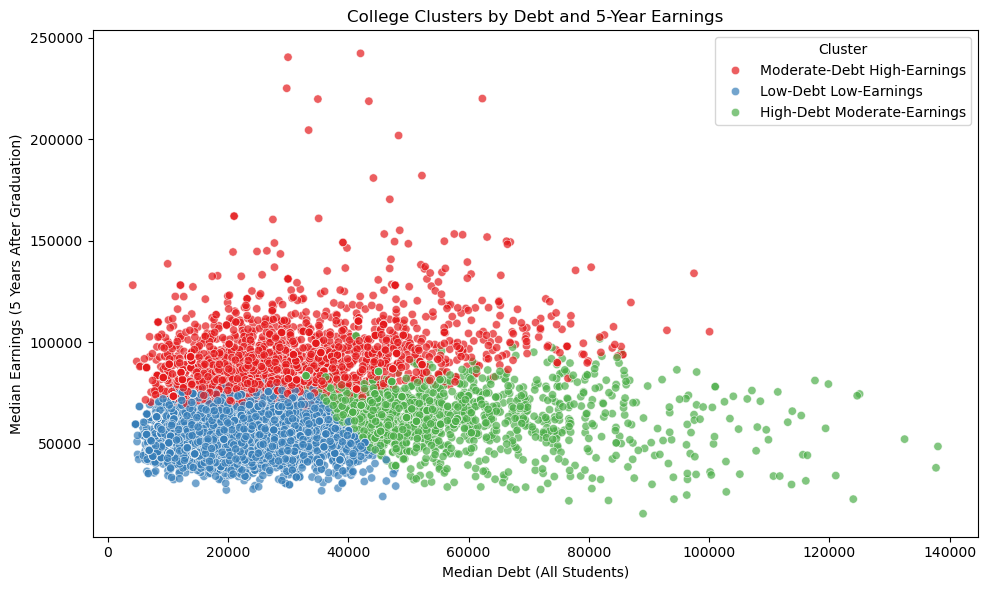

In [146]:
# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='DEBT_ALL_PP_ANY_MDN',
    y='EARN_MDN_5YR',
    hue='Cluster_Label',
    palette='Set1',
    alpha=0.7
)
plt.title("College Clusters by Debt and 5-Year Earnings")
plt.xlabel("Median Debt (All Students)")
plt.ylabel("Median Earnings (5 Years After Graduation)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [147]:
cluster_summary = df_clean.groupby('Cluster')[['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR']].mean().round(2)
cluster_summary['Count'] = df_clean['Cluster'].value_counts().sort_index()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          DEBT_ALL_PP_ANY_MDN  EARN_MDN_1YR  EARN_MDN_4YR  EARN_MDN_5YR  Count
Cluster                                                                      
0                   30667.30      71010.50      80709.59      92631.68   1979
1                   22543.80      36658.11      46688.91      54182.07   4370
2                   57493.46      37182.83      53459.09      63411.31   1345


In [148]:
# calculate ROI
df_clean['Earnings_to_Debt'] = df_clean['EARN_MDN_5YR'] / df_clean['DEBT_ALL_PP_ANY_MDN']
df_clean['Earnings_to_Debt'] = df_clean['Earnings_to_Debt'].replace([float('inf'), -float('inf')], None)

C:\Users\layan\AppData\Local\Temp\ipykernel_14276\3562637460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Earnings_to_Debt'] = df_clean['EARN_MDN_5YR'] / df_clean['DEBT_ALL_PP_ANY_MDN']
C:\Users\layan\AppData\Local\Temp\ipykernel_14276\3562637460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Earnings_to_Debt'] = df_clean['Earnings_to_Debt'].replace([float('inf'), -float('inf')], None)


In [149]:
# pull top 3 best ROI programs per cluster
top_programs = df_clean.sort_values(by='Earnings_to_Debt', ascending=False).groupby('Cluster').head(3)
print("Top 3 programs by ROI in each cluster:\n", top_programs[['INSTNM', 'CIPDESC', 'DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_5YR', 'Earnings_to_Debt']])

Top 3 programs by ROI in each cluster:
                                                    INSTNM  \
114371                                CUNY Lehman College   
6594                University of Arkansas at Little Rock   
210006                       Columbia Southern University   
212911                            Independence University   
177426                            Stevens-Henager College   
207830                       Strayer University-Tennessee   
18074                              University of La Verne   
10477   California Polytechnic State University-San Lu...   
205934                 University of Connecticut-Stamford   

                                                  CIPDESC  \
114371  Registered Nursing, Nursing Administration, Nu...   
6594    Registered Nursing, Nursing Administration, Nu...   
210006                                   Fire Protection.   
212911                                     Public Health.   
177426                                     P